### Passo 1: Importando o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

names = ["ID", "CLUMP_tHICKNESS", "CELL_SIZE", "CELL_SHAPE", 
        "ADHESION", "EPITHELIAL_CELL_SIZE", "BARE_NUCLEI", 
         "BLAND_CHROMATIN", "NORMAL_NUCLEOLI", "MITOSES", "TARGET"]

df = pd.read_csv("breast-cancer-wisconsin (2).data", names = names)

print("################################# DATASET #######################################")
print(df.head())
print("")

print("################################# DATASET INFO #######################################")
print(df.info())

################################# DATASET #######################################
        ID  CLUMP_tHICKNESS  CELL_SIZE  CELL_SHAPE  ADHESION  \
0  1000025                5          1           1         1   
1  1002945                5          4           4         5   
2  1015425                3          1           1         1   
3  1016277                6          8           8         1   
4  1017023                4          1           1         3   

   EPITHELIAL_CELL_SIZE BARE_NUCLEI  BLAND_CHROMATIN  NORMAL_NUCLEOLI  \
0                     2           1                3                1   
1                     7          10                3                2   
2                     2           2                3                1   
3                     3           4                3                7   
4                     2           1                3                1   

   MITOSES  TARGET  
0        1       2  
1        1       2  
2        1       2  
3        1

### Passo 2.1: Pré-processamento: Checando valores únicos

In [2]:
for i, column in enumerate(names):

    unique = df[column].unique()
    
    print("Valores únicos para ", column)
    print(unique)
    print("")

Valores únicos para  ID
[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795

É possível observar que a variável 'BARE_NUCLEI' apresenta "?". O próximo passo é analisar quantos "?" aparecem nessa variável para poder fazer a substituição da mesma

### Passo 2.2: Pré-processamento: Checando quantidade de "?"

In [3]:
print(df['BARE_NUCLEI'].value_counts())

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BARE_NUCLEI, dtype: int64


### Passo 2.3: Pré-processamento: Trocando "?" pela média

In [4]:
df["BARE_NUCLEI"] = pd.to_numeric(df["BARE_NUCLEI"], errors='coerce')
mean = df["BARE_NUCLEI"].mean()
df["BARE_NUCLEI"] = df["BARE_NUCLEI"].fillna(mean)
df["BARE_NUCLEI"] = df["BARE_NUCLEI"].astype("int64")


print(df["BARE_NUCLEI"].head(30))

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     3
24     1
25     7
26     1
27     1
28     1
29     1
Name: BARE_NUCLEI, dtype: int64


### Passo 2.4: Pré-processamento: Checando a distriuição das variáveis

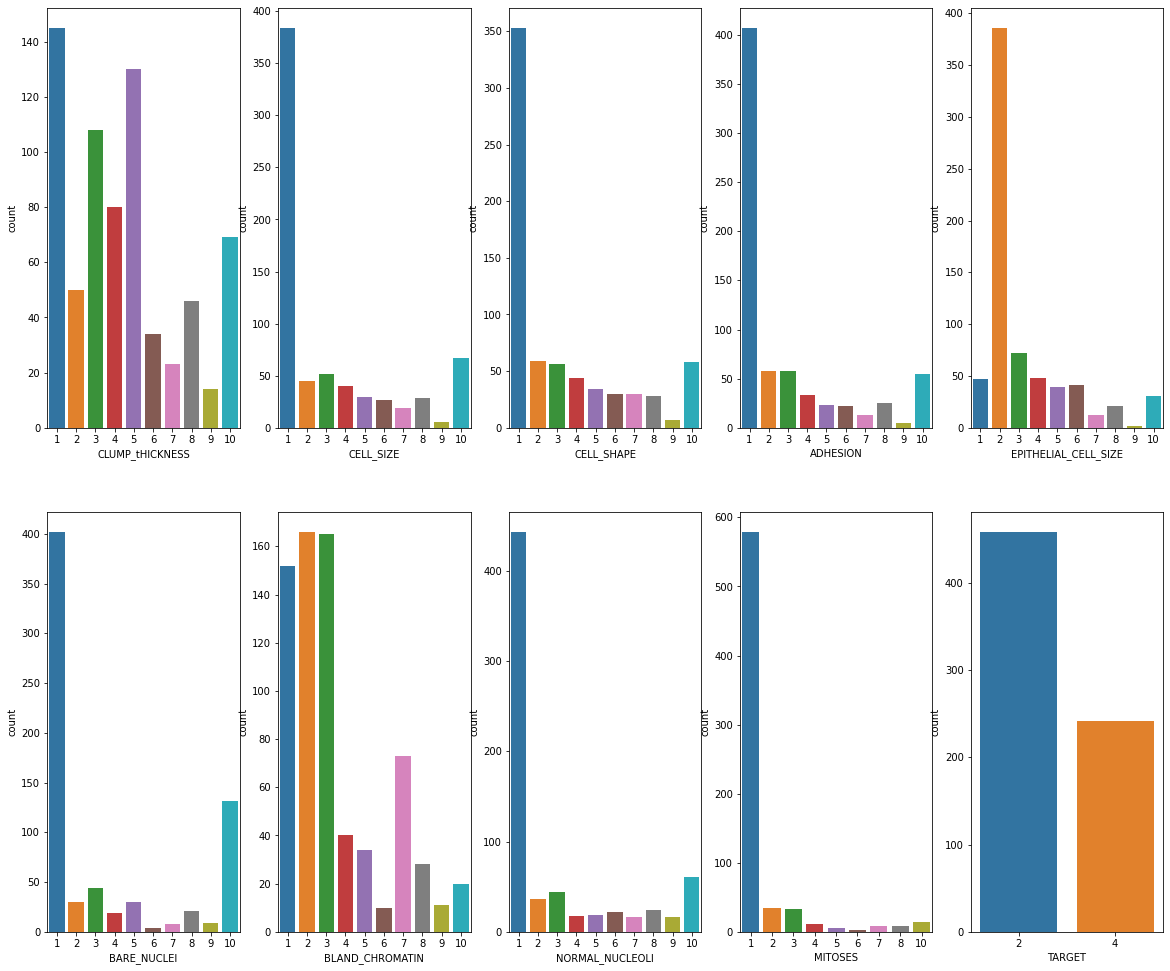

In [5]:
df2 = df.drop(columns =["ID"])

n = 2
m = 5

fig, ax = plt.subplots(n, m, figsize = (20, 17))

for i, ax in enumerate(fig.axes):
    sns.countplot(data = df2, x = df2.columns[i], ax = ax)


 É possível identificar que a variável target está desbalanceada, o que pode ser ruim na hora de treinar o modelo preditivo

### Passo 2.5: Pré-processamento: Correlação entre variáveis (Sem balanceamento)

Text(0.5, 1.0, 'Matriz de correlação')

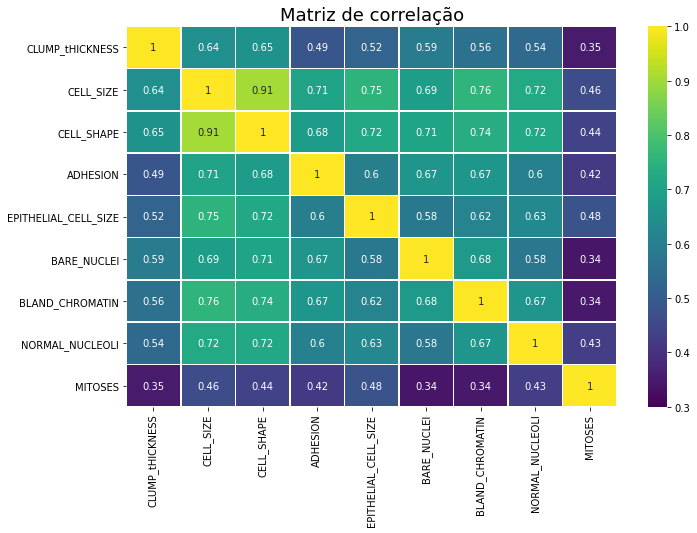

In [6]:
#------------------------ Matriz de correlação ---------------------#
df3 = df2.drop(columns=["TARGET"])
correlacao = df3.corr()

plt.figure(figsize = (11, 7))
sns.heatmap(correlacao, cmap='viridis', annot=True, vmax = 1.0, vmin = 0.3, linewidths=.5)
plt.title("Matriz de correlação", fontsize = 18)

É possível observar que alguns atributos estão bem correlacionados entre si. Por exemplo os atributos CELL_SIZE e CELL_SHAPE apresentam uma correlação forte. Isto pode ser um problema na contrução do modelo devido ao problema de colinearidade

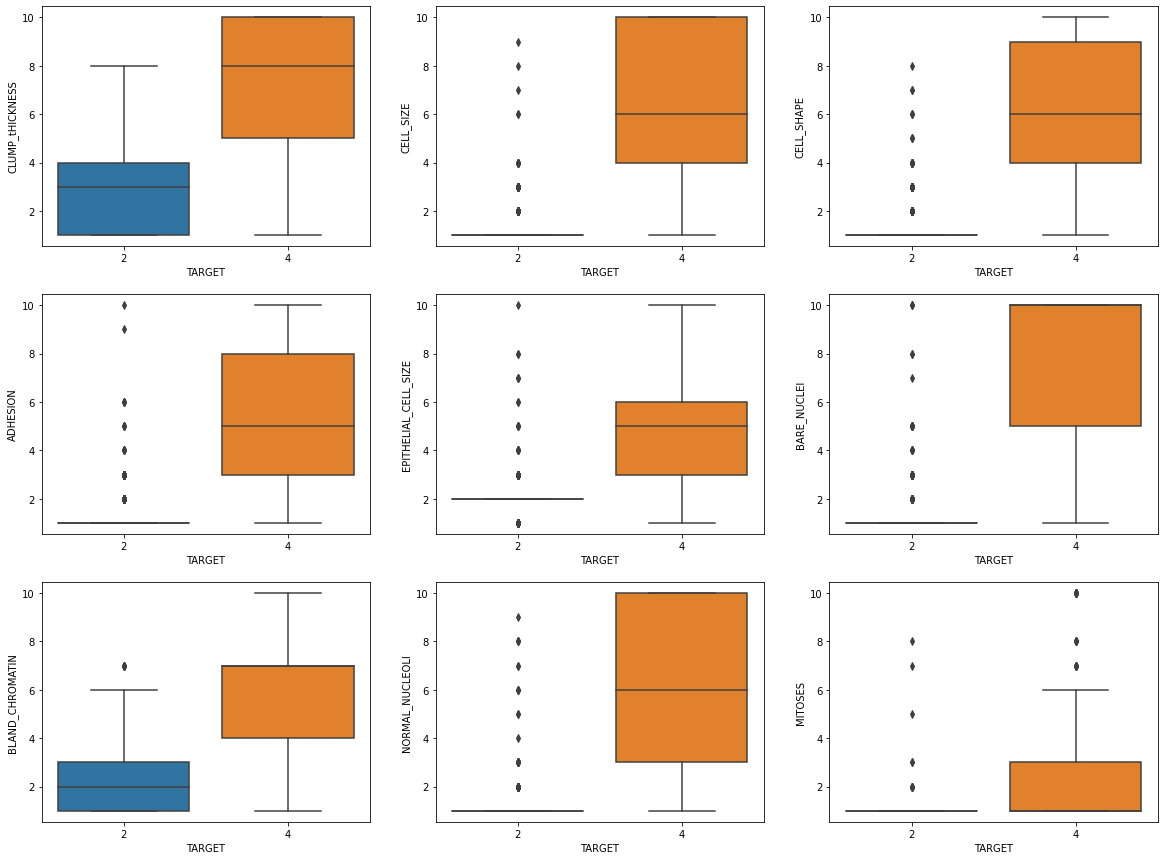

In [7]:
n = 3
m = 3

fig, ax = plt.subplots(n, m, figsize = (20, 15))

for i, ax in enumerate(fig.axes):
    
    sns.boxplot(data = df2, x = df2["TARGET"], y = df3.columns[i], ax = ax)

Pelos gráficos de box plot é identificável a variação da média em cada um dos atributos com a variação da variável TARGET. Isto mostra que existe uma correlação entre cada atributo e a TARGET 

### Passo 3.1: Ajuste do modelo preditivo (Sem balanceamento)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

target = df["TARGET"]
#--------------------Separando dados de treino e teste--------------------------#
X_train, X_test, Y_train, Y_test= train_test_split(df3, target,
                                                   test_size= 0.3, random_state= 0)

#---------------------------- Ajuste do modelo ---------------------------------#
rfc = RandomForestClassifier()
modelo = rfc.fit(X_train, Y_train)

#-------------------- Predições com dados de treino -----------------------------#
previsoes_train = modelo.predict(X_train)

#-------------------- Predições com dados de teste -----------------------------#
previsoes_test = modelo.predict(X_test)

#---------------------- Acurácia nos dados de treino ----------------------------#
acuracia_train = accuracy_score(Y_train, previsoes_train)

#---------------------- Acurácia nos dados de teste ----------------------------#
acuracia_test = accuracy_score(Y_test, previsoes_test)

#---------------------- Matriz de confusão nos dados de treino ----------------------------#
matriz_train = confusion_matrix(Y_train, previsoes_train)

#---------------------- Matriz de confusão nos dados de teste ----------------------------#
matriz_test = confusion_matrix(Y_test, previsoes_test)


print("Acurácia para os dados de treino: ", acuracia_train)
print("###################### Matriz de confusão para os dados de treino #########################")
print(matriz_train)

print("")
print("Acurácia para os dados de teste: ", acuracia_test)
print("###################### Matriz de confusão para os dados de teste #########################")
print(matriz_test)


/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Acurácia para os dados de treino:  1.0
###################### Matriz de confusão para os dados de treino #########################
[[323   0]
 [  0 166]]

Acurácia para os dados de teste:  0.9523809523809523
###################### Matriz de confusão para os dados de teste #########################
[[128   7]
 [  3  72]]
